<a href="https://colab.research.google.com/github/DiwakarBasnet/Machine-Learning/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Logistic Regression

Logistic regression predicts the output of a categorical dependent variable. It is much similar to linear regression except that how they are used. In Logistic regression, instead of fitting a regression line, we fit an "S" shaped logistic function which predicts two maximum values(0/1). In logistic regression, we use the concept of threshold value, which defines the probability of 0 or 1. For good performance, the independent variables must be unrelated to one another. That is there should be minimal or no multicollinearity in the model.

##Logistic Regression Equation

The logistic regression equation can be obtained from linear regression equation. The mathematical steps to get Logistic Regression equations are;

* Equation of straight line:
\begin{align}
  \mathbf{y} = b_0 + b_1x_1 + b_2x_2 + .... b_nx_n 
\end{align}
* Divide y by (1-y) since y can be be between 0 and 1
\begin{align}
  \frac{y}{1-y}
\end{align}
* But we need range between -infinity to +infinity
\begin{align}
  \mathbf{log[\frac{y}{1-y}]} = b_0 + b_1x_1 + b_2x_2 + .... b_nx_n 
\end{align}

##Types of Logistic Regression

1. **Binary Logistic Regression -** 2 or binary outcomes
2. **Multinomial Logistic Regression -** 3 or more outcomes with no order
3. **Ordinarl Logistic Regression -** 3 or more outcomes like multinomial logistic regression but here with the order like customer rating in the supermarket from 1 to 5

#Data Preprocessing

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

##About Dataset
The dataset contains 4 independent varaibles which are sepal and petal (parts of flower) length and width. 

In [ ]:
# Getting the dataset
url = 'https://raw.githubusercontent.com/SSaishruthi/LogisticRegression_Vectorized_Implementation/master/iris-data.csv'
df = pd.read_csv(url)

In [ ]:
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.shape

(150, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df = df.dropna(subset=['petal_width_cm'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  145 non-null    float64
 1   sepal_width_cm   145 non-null    float64
 2   petal_length_cm  145 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            145 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


In [ ]:
df['class'].value_counts()

Iris-virginica     50
Iris-versicolor    45
Iris-setosa        44
versicolor          5
Iris-setossa        1
Name: class, dtype: int64

Two observations can be made from above results
* For 5 data points 'Iris-versicolor' has been specified as 'versicolor'
* For 1 data point 'Iris-setosa' has been specified as 'Iris-setossa'

In [ ]:
df['class'].replace(['versicolor','Iris-setossa'],['Iris-versicolor','Iris-setosa'], inplace=True)
df['class'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        45
Name: class, dtype: int64

##Plot

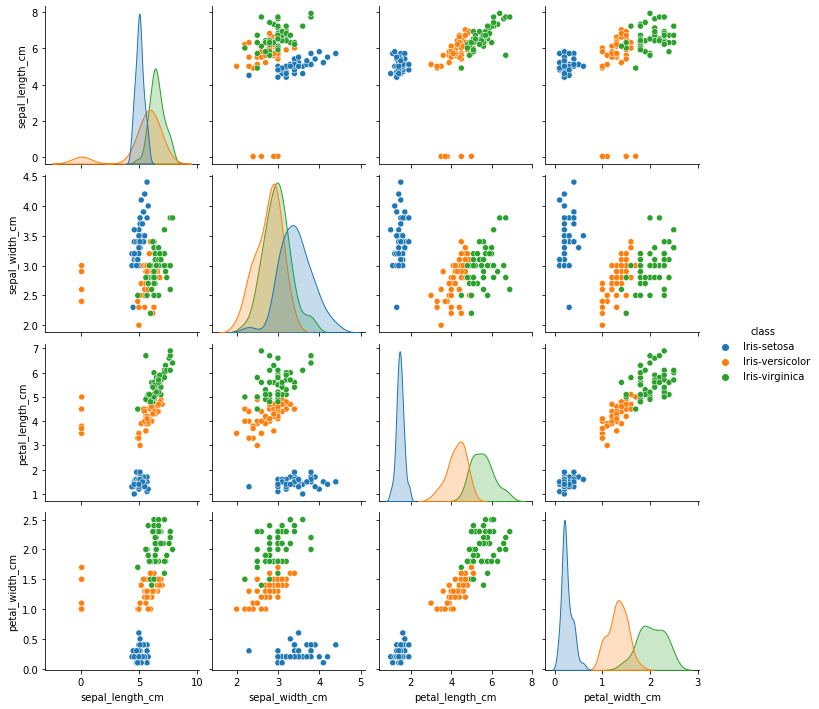

In [ ]:
sns.pairplot(df, hue='class', height=2.5)

In [ ]:
df['class'].replace(["Iris-versicolor","Iris-virginica","Iris-setosa"],[1,2,3], inplace=True)

In [ ]:
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,3
1,4.9,3.0,1.4,0.2,3
2,4.7,3.2,1.3,0.2,3
3,4.6,3.1,1.5,0.2,3
4,5.0,3.6,1.4,0.2,3


In [ ]:
# Declare feature variable and target variable
X = df.drop(df.columns[[4]], axis=1)    # feature
y = df['class']                         # target

##Train test split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Model

In [ ]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(solver='lbfgs', max_iter=1000)
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

#Prediction and evaluation

In [ ]:
y_pred = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.82      0.90      0.86        10
           2       0.90      0.82      0.86        11
           3       1.00      1.00      1.00         8

    accuracy                           0.90        29
   macro avg       0.91      0.91      0.90        29
weighted avg       0.90      0.90      0.90        29

